# Pandas
**Pandas** (*python data analysis*) — модуль для работы с табличными данными, основанный на **NumPy**. Основные особенности:
* удобная и эффективная работа с различными типами данных в разных столбцах таблицы
* набор статистических операций для обработки данных и моделирования
* встроенная обработка отсутствующих/пропущенных данных
* поддержка сложных методов индексации (как в **NumPy**)
* высокооптимизированный код на **C**
* поддержка работы с большими объемами данных

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np

Наибольшее количество выводимых строк задается параметром *pd.options.display.max_rows*. Можно изменить его значение:

In [7]:
pd.options.display.max_rows = 10  # Будет выводиться не более 10 строк

## Два основных типа объектов: pd.Series и pd.DataFrame 

## Series (серия)


Серия - тип данных, в основе которого **одномерный массив элементов одного типа**, как и в **NumPy**.

В блоке ниже создается серия элементов 10, 11, ..., 14. При выводе на экран этой серии получаем два столбца: в первом столбце автоматически сгенерированные *индексы* элементов, во втором сами *элементы*.

In [8]:
s = pd.Series(range(10,15))
print('Серия:\n', s)

Серия:
 0    10
1    11
2    12
3    13
4    14
dtype: int64


Можно обратиться к элементу серии по *индексу*: вывести его на экран, изменить его значение, ... :

In [9]:
print(
    f'Индексация:',
    f's[2]: {s[2]}\n'
)

s[2] = 0
print('Модификация (s[2] = 0):', s)

Индексация: s[2]: 12

Модификация (s[2] = 0): 0    10
1    11
2     0
3    13
4    14
dtype: int64


Серии могут работать как **словарь (dict)**.

В предыдущем примере *индексы* элементов были выставлены по умолчанию (0,1,2,...), но их можно задавать самостоятельно:

In [10]:
s = pd.Series(range(10,15), index=['e', 'd', 'c', 'b', 'a'])
print('Серия:', s)

Серия: e    10
d    11
c    12
b    13
a    14
dtype: int64


In [11]:
print(
    'Обращение по индексу:',
    f"s['c'] = {s['c']}\n"
)

Обращение по индексу: s['c'] = 12



Обращение по ключу, которого нет в серии вызывает `KeyError`:

In [12]:
s['f']

KeyError: 'f'

Чтобы не допускать ошибку KeyError, вместо прямого обращения по индексу, можно использовать метод `get(a,b)`, который будет искать в серии *ключ*, переданный в качестве первого аргумента функции `a`. Если *ключ* не найден, то будет выведено значение, переданное в качестве второго аргумента функции `b`, или `None`, если `b` не задан. 

In [13]:
print(
    'Получение доступа к несуществующему ключу:', '\n',
    s.get('f', 'Нет такого ключа!'), '\n',
    s.get('q')
)

Получение доступа к несуществующему ключу: 
 Нет такого ключа! 
 None


Обратите внимание, что значения в серии остаются упорядочеными, т.е. серия ведет себя как упорядоченный **словарь** (`collections.OrderedDict`).
Начиная с **Python 3.6**, серии можно создавать из обычных словарей, так как в **Python 3.6** обычные словари стали сохранять порядок.

Серии поддерживают типичные операции `np.array` (маски, индексирование, расширяющие функции...):

In [14]:
s = pd.Series(range(10,15), index=['e', 'd', 'c', 'b', 'a'])
print('Серия:', s)

Серия: e    10
d    11
c    12
b    13
a    14
dtype: int64


**Маска** — массив булевых значний (True, False). Для примера получим **маску**, четные элементы которой будут иметь значение *True*, а нечетные — *False*:

In [15]:
mask = s%2 == 0
print('Маска четных элементов:\n', mask)

Маска четных элементов:
 e     True
d    False
c     True
b    False
a     True
dtype: bool


Маску можно использовать для отделения интересующих элементов:

In [16]:
print(
    'Выбор элементов серии по маске:\n', s[mask],
)

Выбор элементов серии по маске:
 e    10
c    12
a    14
dtype: int64


In [17]:
print(
    'Индексация по массиву индексов:\n', s[['a','e','b']],
)

Индексация по массиву индексов:
 a    14
e    10
b    13
dtype: int64


In [18]:
print(
    'Применение функций из NumPy:\n', np.square(s),
)

Применение функций из NumPy:
 e    100
d    121
c    144
b    169
a    196
dtype: int64


In [19]:
print(
    'Расширяющиеся операции (как в NumPy):\n', s - 5,
)

Расширяющиеся операции (как в NumPy):
 e    5
d    6
c    7
b    8
a    9
dtype: int64


Увеличиваем на 1 значения элементов, которые больше чем среднее по серии:

In [20]:
s[s > s.mean()] += 1 
print('Присвоение набору элементов:\n', s)

Присвоение набору элементов:
 e    10
d    11
c    12
b    14
a    15
dtype: int64


Индексы серии могут быть изменены "на лету": 

In [21]:
print('s с текущей индексацией:\n', s)
s.index = list('AbCdE')
print('s с новой индексацией:\n', s)

s с текущей индексацией:
 e    10
d    11
c    12
b    14
a    15
dtype: int64
s с новой индексацией:
 A    10
b    11
C    12
d    14
E    15
dtype: int64


Можно задать имя серии и индексу: 

In [22]:
s.name = 'Series Name'
s.index.name = 'Index Name'
print('Именованная серия:\n', s)

Именованная серия:
 Index Name
A    10
b    11
C    12
d    14
E    15
Name: Series Name, dtype: int64


Получение индексов и элементов серии:

In [23]:
print('Индекс:', s.index) 
print('Значения:', s.values)

Индекс: Index(['A', 'b', 'C', 'd', 'E'], dtype='object', name='Index Name')
Значения: [10 11 12 14 15]


## Задача Series_1. 




1. Создайте серию `pd.Series`, которая будет содрежать инфомацию о целочисленных оценках на экзамене по алгебре учеников: Александр, Борис, Владимир, Дмитрий, Григорий, Евгений, Игорь, Клим, Леонид, Максим. Созданную серию сохраните в переменную one_mark. Этой серии задайте имя "Оценка по алгебре". Выведите полученную серию на экран.
2. Увеличьте оценку Максима на 1 балл и сохраните ее в серии. Выведите на экран из серию только оценку Максима.
3. Задав маску, получить и вывести информацию о тем учениках, у которых оценка не меньше 4.

In [ ]:
# Напишите свой код в данной ячейке

[Посмотреть ответ на задачу](#Series_1)

## DataFrame


**DataFrame** — набор серий. В **DataFrame** каждая серия — отдельный столбец, совокупность столбов образует *таблицу*. 


### Способы создать `DataFrame`

In [24]:
# Способ 1:
df = pd.DataFrame([[10, 11], [20, 21], [30, 31]],
                  columns=['A', 'B'])
df

,A,B
0,10,11
1,20,21
2,30,31


In [25]:
# Способ 2: создание DataFrame из двух pd.Series
series_1 = pd.Series([10, 20, 30])
series_2 = pd.Series([-3, -4, -5])
df = pd.DataFrame([series_1, series_2])
df


,0,1,2
0,10,20,30
1,-3,-4,-5


In [26]:
# Способ 3: создание DataFrame с помощью словаря
list_1 = [70, 71]
list_2 = [90, 91]
temperatures = {'col_1': list_1,
                'col_2': list_2}
pd.DataFrame(temperatures)

,col_1,col_2
0,70,90
1,71,91


In [27]:
# Способ 4: создание DataFrame с помощью словаря, значениями которого являются Series
series_1 = pd.Series([70, 71])
series_2 = pd.Series([90, 91])

df = pd.DataFrame({'col_1': series_1,
                   'col_2': series_2})
df

,col_1,col_2
0,70,90
1,71,91


In [28]:
# Способ 5:
names = ['Bob','Jessica','Mary','John']
births = [968, 155, 77, 578]

data = list(zip(names,births))
print('Данные:', data)

df = pd.DataFrame(data, columns=['Names', 'Births'], index=['A','B','C','D'])
df

Данные: [('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578)]


,Names,Births
A,Bob,968
B,Jessica,155
C,Mary,77
D,John,578


### Задача DataFrame_1. 




Создайте `pd.DataFrame`, которая будет содержать инфомацию о целочисленных оценках на экзаменах по алгебре, геометрии и физике учеников: Александр, Борис, Владимир, Дмитрий, Григорий, Евгений, Игорь, Клим, Леонид, Максим. Созданный `DataFrame` сохраните в переменную marks. Этому `DataFrame` задайте имя "*Экзаменационные оценки*" и выведите его на экран.


In [ ]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#DataFrame_1)

### Получение элементов `DataFrame`.


DataFrame поддерживает индексацию различными методами. 

* Обычная индексация (`df[col]`) позволяет обращаться к столбцам по названию
* Свойство `.iloc[row, column]` позволяет обращаться к строкам и столбцам по номеру, слайсу или маске.
* Свойство `.loc[row, column]` позволяет обращаться к строкам и столбцам по названию, слайсу или маске.
* Свойства, совподающие по имени с названиями столбцов. В данном случае - `df.Births` и `df.Names`

Получим содержимое столбца `'Names'` из `df`:

In [29]:
print(
    'Столбец "Names":\n', df['Names']
)

Столбец "Names":
 A        Bob
B    Jessica
C       Mary
D       John
Name: Names, dtype: object


Получим столбцы `Births`, `Names` из `df`:

In [30]:
print(
    'Столбцы "Births", "Names":\n', df[['Births', 'Names']]
)

Столбцы "Births", "Names":
    Births    Names
A     968      Bob
B     155  Jessica
C      77     Mary
D     578     John


Используем `.iloc[:, 1]` для получения всех (`:`) элементов столбца с номером `1`:

In [31]:
print(
    'Столбец №1:\n', df.iloc[:, 1]
)

Столбец №1:
 A    968
B    155
C     77
D    578
Name: Births, dtype: int64


Используем `.loc[]` для получения строки А. Следут обратить внимание, что номер столбца при этом не был указан, что обеспечило вывод всех элементов строки: 

In [32]:
print(
    'Строка A:', df.loc['A'],
)

Строка A: Names     Bob
Births    968
Name: A, dtype: object


In [33]:
print(
    'Строка 3:\n', df.iloc[3],
)

Строка 3:
 Names     John
Births     578
Name: D, dtype: object


Используя `.loc[]`, получим все строки c индексами из диапазона от A до С (`'A':'C'`), которые находятся в столбце Names:

In [34]:
print(
    'Имена из строк A, B, C:', df.loc['A':'C', 'Names'],
)

Имена из строк A, B, C: A        Bob
B    Jessica
C       Mary
Name: Names, dtype: object


Используя `.iloc[1:4, 1]`, получим элементы находящиеся на пересечении 1, 2, 3 строк и первого столбца:

In [35]:
print(
    'Количества рождений из строк 1, 2, 3:', df.iloc[1:4, 1]
)

Количества рождений из строк 1, 2, 3: B    155
C     77
D    578
Name: Births, dtype: int64


Создадим маску, выведем маску и элементы `df`, соответсвующие этой маске: 

In [36]:
row_mask = df['Births'] < 500

print(
    'Маска:\n', row_mask,
    '\n', '\n',
    'Строки:\n', df.loc[row_mask]
)

Маска:
 A    False
B     True
C     True
D    False
Name: Births, dtype: bool 
 
 Строки:
      Names  Births
B  Jessica     155
C     Mary      77


Получить элементы столбца Names можно еще таким образом:

In [38]:
df.Names

A        Bob
B    Jessica
C       Mary
D       John
Name: Names, dtype: object

С помощью head и tail можно ограничить количество элементов в отображаемой выборке:

In [39]:
print(
    '1 строка:', df.head(1), '\n', 
    '2 последние строки:', df.tail(2),
)

1 строка:   Names  Births
A   Bob     968 
 2 последние строки:   Names  Births
C  Mary      77
D  John     578


`max(), min(), mean()` для поиска максимума, минимума, среднего значения в столбце.

In [40]:
print(
    'Максимум:', df['Births'].max(), '\n',
    'Минимум:', df['Births'].min(), '\n',
    'Среднее:', df['Births'].mean(), '\n' 
)

Максимум: 968 
 Минимум: 77 
 Среднее: 444.5 



### Cортировка 

Сортировка всего DataFrame'а по возрастанию значений в столбце *Births*:


In [41]:
df.sort_values('Births')

,Names,Births
C,Mary,77
B,Jessica,155
D,John,578
A,Bob,968


Передав значение параметра `ascending=False` в `sort_values()`, получим сортировку по убыванию:

In [42]:
df.sort_values('Births', ascending=False)

,Names,Births
A,Bob,968
D,John,578
B,Jessica,155
C,Mary,77


### Внесение изменений в DataFrame


В предыдущих ячейках блокнота результаты сортировки были выведены на экран, но не были сохранены куда-либо (`df` остался без изменений). Такое поведение характерно для большинства операций производимых с `DataFrame`. 



In [43]:
df

,Names,Births
A,Bob,968
B,Jessica,155
C,Mary,77
D,John,578


Для сохранения результатов произведенной операции их необходимо явно сохранить куда-либо:

In [45]:
df_sorted = df.sort_values('Births', ascending=False)
df_sorted

,Names,Births
A,Bob,968
D,John,578
B,Jessica,155
C,Mary,77


### Задача DataFrame_2. 




Полученный в DataFrame_1 `marks` изменить следующим образом (все изменения должны быть сохранены в `marks`):
  1.  Оценки всех учеников по геометрии уменьшите на 1 балл.
  2.  Увеличьте все оценки Максима на 1 балл.
  3.  Измените оценку по алгебре у Бориса на 5.
  4.  Измените все оценки в столбце №2 на 4. <br>
Выведите `marks` на экран.


In [ ]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#DataFrame_2)

### .apply()
для применения действия к набору элементов из `df`

Создадим новый столбец с инициалами имен, для этого с помощью `apply()`  применим `lambda`-функцию к каждому элементу колонки Names (аналог `map`)

In [46]:
df['Initial'] = df['Names'].apply(lambda x: x[0])
df

,Names,Births,Initial
A,Bob,968,B
B,Jessica,155,J
C,Mary,77,M
D,John,578,J


### Удаление столба:

In [47]:
del df['Initial']
df

,Names,Births
A,Bob,968
B,Jessica,155
C,Mary,77
D,John,578


### Изучение данных в DataFrame

#### Импорт и экспорт данных


**Pandas** имеет множество встроенных функций для импорта и экспорта данных. Вот наиболее полезные из них:
* `pd.read_json` и `df.to_json`
* `pd.read_excel` и `df.to_excel` (требует наличия установленных модулей `openpyxl` и `xlrd`)
* `pd.read_csv` и `pd.to_csv`

Проведем анализ результатов экзамена, которые находятся в файле. Необходимо задать путь до файла *StudentsPerformance.csv*.
*   Если вы работаете не в **Google Colaboratory**, то обращаетесь к файлам на своем жестком диске, напимер, посредством модуля `os`.
*   Если вы используте **Google Colaboratory**, то нужно выполнить:

In [50]:
from google.colab import drive
drive.mount('/content/gdrive')  
gc_folder = r"/content/gdrive/My Drive/Colab Notebooks/"  # Стандартный путь до файлов на гугл диске

ModuleNotFoundError: No module named 'google'

Модифицируем стандартный путь так, чтобы обратиться к файлу. 
Отредактируйте эту строку так, чтобы в `gc_folder` содержался полный путь до папки, в которой находится *StudentsPerformance.csv.* :

In [ ]:
gc_folder += r'КУРС Python для анализа данных/files/'  

Далее необходимо дополнить путь **gc_path** так, чтобы получить точный путь до файла на вашем **Google Disk**, например, так:

In [55]:
my_file_path = 'StudentsPerformance.csv'
df = pd.read_csv(my_file_path)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


В данном случае csv файл был отформатирован стандартным образом и импорт прошел успешно. Функция `read_csv` принимает [большое количество параметров](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), что позволяет использовать ее для импорта файлов с нестандартным форматированием данных.

#### Знакомство с таблицей

In [56]:
df.info()  # Общая информация о DataFrame df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [57]:
df.size  # Количество объектов в df

8000

In [58]:
df.index  # Индексы df

RangeIndex(start=0, stop=1000, step=1)

In [59]:
df.values  # Значения df

array([['female', 'group B', "bachelor's degree", ..., 72, 72, 74],
       ['female', 'group C', 'some college', ..., 69, 90, 88],
       ['female', 'group B', "master's degree", ..., 90, 95, 93],
       ...,
       ['female', 'group C', 'high school', ..., 59, 71, 65],
       ['female', 'group D', 'some college', ..., 68, 78, 77],
       ['female', 'group D', 'some college', ..., 77, 86, 86]],
      dtype=object)

In [60]:
df.dtypes  # Типы данных для каждого столбца df

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [61]:
df.describe()  # Рассчитанные характеристики df

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Рассмотрим столбец "*test preparation course*"

In [62]:
print('Описание столбца:\n', df['test preparation course'].describe())

Описание столбца:
 count     1000
unique       2
top       none
freq       642
Name: test preparation course, dtype: object


Используя `.unique()`, можно получить все уникальные значения в наборе:

In [63]:
print('\nУникальные значения:', df['test preparation course'].unique())


Уникальные значения: ['none' 'completed']


Сейчас данные столбца *test preparation course* хранятся в виде строк и принимают всего два значения: 'none' и 'completed'. Удобнее продолжить работу с такими данными, как с булевыми переменными. Для этого в столбце *test preparation course* запишем `True`, если в нем было значение *completed*, иначе `False`.


In [64]:
df['test preparation course'] = (df['test preparation course'] == 'completed')
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,False,72,72,74
1,female,group C,some college,standard,True,69,90,88
2,female,group B,master's degree,standard,False,90,95,93


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   bool  
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 55.8+ KB


Рассмотрим, как прохождение подготовительного курса сказывается на результатах экзамена по математике:

In [66]:
print('Прошедшие подготовительный курс:',    df[ df['test preparation course']]['math score'].describe())
print('Не прошедшие подготовительный курс:', df[~df['test preparation course']]['math score'].describe()) # ~ - логическое "не"

Прошедшие подготовительный курс: count    358.000000
mean      69.695531
std       14.444699
min       23.000000
25%       60.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math score, dtype: float64
Не прошедшие подготовительный курс: count    642.000000
mean      64.077882
std       15.192376
min        0.000000
25%       54.000000
50%       64.000000
75%       74.750000
max      100.000000
Name: math score, dtype: float64


Рассмотрим как уровень образования родителей сказывается на результатах экзаменов ребенка

In [67]:
print('Различные уровни образования родителей:', df['parental level of education'].unique())

Различные уровни образования родителей: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Такие данные лучше представить не в виде строк, а в виде категорий: это уменьшает объем используемой памяти и позволит обрабатывать эти данные более эффективно

In [68]:
from pandas.api.types import CategoricalDtype

edu_levels = CategoricalDtype(
    categories=[  # Уровни образования в порядке возрастания:
        "some high school",
        "high school", 
        "some college", 
        "associate's degree",
        "bachelor's degree",
        "master's degree",
    ],
    ordered=True  # Отмечаем, что среди этих категорий установлено отношение порядка
)

df['parental level of education']=df['parental level of education'].astype(edu_levels)

#### groupby() - Групировка по значениям



Используя `groupby()`, сгруппируем значения столбца *parental level of education* и, используя `mean()`, для каждого уровня образования родителей посчитаем среднюю оценку по математике:

In [69]:
by_parents_edu_level = df.groupby('parental level of education')  # Группируем значения столбца parental level of education

/var/folders/_n/mprkc30d1rj6jyblw653vk_00000gn/T/ipykernel_6853/3611358735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_parents_edu_level = df.groupby('parental level of education')  # Группируем значения столбца parental level of education


In [70]:
by_parents_edu_level_mean = by_parents_edu_level['math score'].mean()  # Средняя оценка по математике
print('Тип type(by_parents_edu_level_mean)=', type(by_parents_edu_level_mean), '\n')
by_parents_edu_level_mean


Тип type(by_parents_edu_level_mean)= <class 'pandas.core.series.Series'> 



parental level of education
some high school      63.497207
high school           62.137755
some college          67.128319
associate's degree    67.882883
bachelor's degree     69.389831
master's degree       69.745763
Name: math score, dtype: float64

Следует отметить, что в ячейке выше *by_parents_edu_level_mean* является `pd.Series`, a столбец *parental level of education* стал индексом. Чтобы избежать этого можно указать параметр со значением `as_index=False`:

In [71]:
by_parents_edu_level_mean = df.groupby('parental level of education', as_index=False)
print('Тип type(by_parents_edu_level_mean)=', type(by_parents_edu_level_mean), '\n')
by_parents_edu_level_mean['math score'].mean()

Тип type(by_parents_edu_level_mean)= <class 'pandas.core.groupby.generic.DataFrameGroupBy'> 



/var/folders/_n/mprkc30d1rj6jyblw653vk_00000gn/T/ipykernel_6853/2399339864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_parents_edu_level_mean = df.groupby('parental level of education', as_index=False)


,parental level of education,math score
0,some high school,63.497207
1,high school,62.137755
2,some college,67.128319
3,associate's degree,67.882883
4,bachelor's degree,69.389831
5,master's degree,69.745763


Количество записей в каждой группе:

In [72]:
by_parents_edu_level_mean.size()

,parental level of education,size
0,some high school,179
1,high school,196
2,some college,226
3,associate's degree,222
4,bachelor's degree,118
5,master's degree,59


### Задача DataFrame_3.



  1.  Добавить в `df` стобец *Средний балл*, в который разместите поделенную на 3 сумму оценок из трёх стобцов: *math score*, *reading score*, *writing score*. Вывести на экран результат.
  2. Произвести группировку по полу ученика (значение в столбце *gender*). После для каждой из полученных групп, найти наименьшее, среднее, наибольшее значение в поле *Средний балл*. Вывести на экран результат.

In [73]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#DataFrame_3)

### where()


позволяет получать записи, которые соответствуют нескольким условиям:

       [Текст ссылки] 
       логическое и: and => ((условие_1) & (условие_2))       
       логическое или: or => ((условие_1) | (условие_2))    

In [74]:
df2 = df.where((df['math score']>=60)&(df['math score']<70))
df2.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,group C,some college,standard,True,69.0,90.0,88.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Чтобы не рассматривать строки, которые содержат **NaN** (*Not-a-Number*, неопределенность), их удаляют с помощью `dropna()`. Ниже отображены те строки df, котоыре не содержат **NaN**:

In [75]:
df.where((df['math score']>=60)&(df['math score']<70)).dropna().head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,True,69.0,90.0,88.0
8,male,group D,high school,free/reduced,True,64.0,64.0,67.0
12,female,group B,high school,standard,False,65.0,81.0,73.0
15,female,group C,some high school,standard,False,69.0,75.0,78.0
20,male,group D,high school,standard,False,66.0,69.0,63.0


In [76]:
df.where((df['math score']<28)|(df['math score']>=30)).head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,False,72.0,72.0,74.0
1,female,group C,some college,standard,True,69.0,90.0,88.0
2,female,group B,master's degree,standard,False,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,False,47.0,57.0,44.0
4,male,group C,some college,standard,False,76.0,78.0,75.0


### Визуализация данных

Черновой график **matplotlib** можно построить командой `.plot()`

<Axes: >

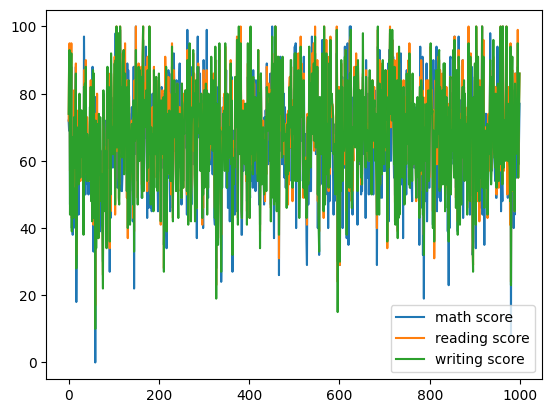

In [77]:
df.plot()

В данном случае этот тип графика неинформативен, лучше воспользоваться, например, гистограммой

<Axes: ylabel='Frequency'>

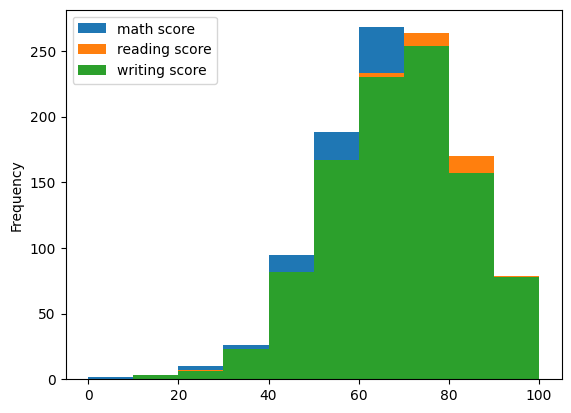

In [78]:
df.plot.hist() # или df.plot(kind='hist')

Для большего контроля за внешним видом графика рекомендуется использовать непосредственно `matplotlib`, но для быстрого визуального осмотра данных эти методы подойдут.

Функция reset_index позволяет задать стандартную индексацию, а текущий индекс сделать одной из колонок таблицы

In [79]:
by_parents_edu_level.size().reset_index()

,parental level of education,0
0,some high school,179
1,high school,196
2,some college,226
3,associate's degree,222
4,bachelor's degree,118
5,master's degree,59


Используя 'drop=True' можно не сохранять старый индекс:

In [80]:
a = by_parents_edu_level.size().reset_index(drop=True)
a

0    179
1    196
2    226
3    222
4    118
5     59
dtype: int64

### Операции с индексом

Указание параметра со значением `inplace=True` обеспечивает сохранение примененного преобразования в DataFrame.

Создадим колонку *sum score* (сумму баллов по экзаменам) и, задав `inplace=True`, сделаем ее индексом:

In [81]:
df['sum score'] = df['math score'] + df['reading score'] + df['writing score']
df.set_index('sum score', inplace=True)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
sum score,,,,,,,,
218,female,group B,bachelor's degree,standard,False,72,72,74
247,female,group C,some college,standard,True,69,90,88
278,female,group B,master's degree,standard,False,90,95,93
148,male,group A,associate's degree,free/reduced,False,47,57,44
229,male,group C,some college,standard,False,76,78,75


Отсортируем таблицу по индексу:

In [82]:
df.sort_index(inplace=True)
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
sum score,,,,,,,,
27,female,group C,some high school,free/reduced,False,0,17,10
55,female,group B,high school,free/reduced,False,8,24,23
69,male,group B,high school,free/reduced,False,30,24,15
70,male,group A,some college,free/reduced,False,28,23,19
78,male,group E,some high school,standard,False,30,26,22


In [83]:
df.index  # Индекс df

Index([ 27,  55,  69,  70,  78,  78,  88,  89,  89,  90,
       ...
       293, 293, 296, 296, 297, 297, 299, 300, 300, 300],
      dtype='int64', name='sum score', length=1000)

#### reset_index()


Функция `reset_index()` позволяет задать стандартную индексацию, а текущий индекс сделать одной из колонок таблицы:

In [84]:
by_parents_edu_level.size().reset_index()

,parental level of education,0
0,some high school,179
1,high school,196
2,some college,226
3,associate's degree,222
4,bachelor's degree,118
5,master's degree,59


Используя 'drop=True' можно не сохранять старый индекс:

In [85]:
a = by_parents_edu_level.size().reset_index(drop=True)
a

0    179
1    196
2    226
3    222
4    118
5     59
dtype: int64

### Прочие функции

Объединение нескольких DataFrame-ов, функция аналогична UNION в SQL:

In [86]:
pd.concat([df, df]).info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 27 to 300
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       2000 non-null   object  
 1   race/ethnicity               2000 non-null   object  
 2   parental level of education  2000 non-null   category
 3   lunch                        2000 non-null   object  
 4   test preparation course      2000 non-null   bool    
 5   math score                   2000 non-null   int64   
 6   reading score                2000 non-null   int64   
 7   writing score                2000 non-null   int64   
dtypes: bool(1), category(1), int64(3), object(3)
memory usage: 113.5+ KB


Создание независимого дубликата датафрейма:

In [ ]:
df_copy = df.copy()

print(df_copy.info())
print(f'\ndf is df_copy is {df is df_copy}')

Импорт данных из Excel:

In [ ]:
df = pd.read_excel(gc_folder + 'pandas_data.xlsx', 0, index_col='StatusDate')
df.head(3)

In [ ]:
df.index

In [ ]:
df.State.unique()

Еще примеры:

In [ ]:
# Приведем названия штатов к верхнему регистру:
df.State = df.State.apply(str.upper)
df.head(3)

In [ ]:
df.State.unique()

In [ ]:
# Выберем записи со статусом 1
df[df.Status == 1]

In [ ]:
# Заменим NJ на NY
mask = df.State == 'NJ'
df.loc[mask,('State')] = 'NY'
df.State.unique()

### Агрегирующие операции agg()

In [ ]:
df = pd.DataFrame({'group1':["a","a","b","b"], 'value':[10,20,30,40]})
df

Для применения агрегирующих операций необходимо задать группировку:

In [ ]:
group = df.groupby('group1')

Затем применить агрегирующую операцию. В примере в качестве агрегирующих использованы операции нахождения мощности объекта `len` и суммирования 'sum'.

In [ ]:
group.agg([len,sum])

Можно задать собственную функцию для агрегирования:

In [ ]:
def my_mean(arr):
    return arr.mean()

df.groupby('group1').agg([my_mean])

In [ ]:
df

### transform()

Результаты агрегирования не сохраняются в `DataFrame`. Для сохранения результатов агрегирования можно применить метод `transform()`

In [ ]:
group = df.groupby('group1')  # Применяем группировку
df['value.sum'] = group.transform('sum')  # Примеяем агрегирующую операцию sum, результат сохраняем в 'value.sum' столбец df
df['value.my_mean'] = group.transform(my_mean)  # Примеяем агрегирующую операцию my_mean, результат сохраняем в 'value.my_mean' столбец df
df

### Задача DataFrame_4. 



In [ ]:
# Рассмотрим набор оценок на экзаменах по математике и физике студентов двух групп:
import random
df_marks = pd.DataFrame({'group': ["group_A" if random.random()>0.5 else "group_B" for i in range(12)], 
                         'math score': [random.randint(40,100) for _ in range(12)], 
                         'physics score': [random.randint(40,100) for _ in range(12)]})
df_marks.head(3)

  1.  Из набора данных `df_marks` получить выборку студентов у которых по всем экзаменам набрано более 60 баллов. Результат сохранить в df_marks2.

  2. В df_marks2 произвести группировку по группе ученика (по значению в столбце *group*). После, используя операцию агрегации, получить для каждой группы среднее значение оценки за каждый экзамен и его разделить на 100.


In [ ]:
# Напишите свой код в данной ячейке


[Посмотреть ответ на задачу](#DataFrame_4)

# Ответы на задачи

<a name="Series_1"></a>
# Ответ на задачу Series_1

In [ ]:
from random import randint
name_mas = ['Александр', 'Борис', 'Владимир', 'Дмитрий', 'Григорий', 'Евгений', 'Игорь', 'Клим', 'Леонид', 'Максим']
one_mark = pd.Series([randint(2,5) for _ in range(len(name_mas))], index=name_mas)
one_mark.name = "Оценка по алгебре"
print(one_mark, '\n')

one_mark['Максим'] += 1
print(f"Оценка Максима стала = {one_mark['Максим']}\n")

print(f'Ученики с оценкой не меньше 4:\n{one_mark[one_mark>=4]}')

<a name="DataFrame_1"></a>
# Ответ на задачу DataFrame_1

In [ ]:
from random import randint
name_mas = ['Александр', 'Борис', 'Владимир', 'Дмитрий', 'Григорий', 'Евгений', 'Игорь', 'Клим', 'Леонид', 'Максим']
exam_name = ['Алгебра', 'Геометрия', 'Физика']

marks_a = [randint(2,5) for _ in range(len(name_mas))]  # Генерируем оценки по алгебре
marks_g = [randint(2,5) for _ in range(len(name_mas))]  # Генерируем оценки по геометрии
marks_p = [randint(2,5) for _ in range(len(name_mas))]  # Генерируем оценки по физике
data = list(zip(marks_a, marks_g, marks_p))

marks = pd.DataFrame(data, columns=exam_name, index=name_mas)
marks

<a name="DataFrame_2"></a>
# Ответ на задачу DataFrame_2

In [ ]:
print(marks)
marks['Геометрия'] -= 1
marks.loc['Максим'] += 1
marks.loc['Борис', 'Алгебра'] = 5
marks.iloc[:, 2] = 4

print(marks)

<a name="DataFrame_3"></a>
# Ответ на задачу DataFrame_3

In [ ]:
# 1
df['Средний балл'] = (df['math score'] + df['reading score'] + df['writing score'])/3
print(df.head(3))

# 2
df_grouped_gender = df.groupby('gender', as_index=False)
print('Наименьший средний балл =\n', df_grouped_gender['Средний балл'].min(), '\n')
print('Наибольший средний балл =\n', df_grouped_gender['Средний балл'].max(), '\n')
print('Среднее значение среднего балла =\n', df_grouped_gender['Средний балл'].mean(), '\n')


<a name="DataFrame_4"></a>
# Ответ на задачу DataFrame_4

In [ ]:
# Ответ на 1:
df_marks.where((df_marks['math score']>=75)&(df_marks['physics score']<75)).dropna().head()

# Ответ на 2:
def mean_div_100(arr):
    return arr.mean() / 100

df_marks.groupby('group').agg([mean_div_100])